In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
pd.options.display.max_columns = 100
pd.set_option('max_colwidth',200)

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_add_feature = pd.read_csv("TrainAdditionalFeatures.csv")
test_add_feature = pd.read_csv("TestAdditionalFeatures.csv")


In [3]:
train_data = pd.merge(train_data, train_add_feature, how='left', on=['imdb_id'])
test_data = pd.merge(test_data, test_add_feature, how='left', on=['imdb_id'])


In [103]:
# train_data.head()

In [440]:
train_data.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
popularity2               118
rating                    118
totalVotes                118
dtype: int64

In [4]:
dict_feature = ['belongs_to_collection', 'genres','production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def string_to_dict(data):
    for feature in dict_feature:
        data[feature] = data[feature].apply(lambda x: ast.literal_eval(x) if not pd.isnull(x) else np.nan)

    return data
                                            
train_data = string_to_dict(train_data)
test_data = string_to_dict(test_data)

In [70]:
train_data.describe(include = 'all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,2999,2844,2945,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03,2882.000000,2882.000000,2882.000000
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,2999,2383,321,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN,NaN,NaN,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}]",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt1135503,en,Fantastic Four,A law firm brings in its 'fixer' to remedy the situation after a lawyer has a breakdown while representing a chemical company that he knows is guilty in a multi-billion dollar class action suit.,NaN,/rNrMAUONKZuU4b3gc7oN4kTuyzX.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Priest,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe44559251416c75031105', 'department': 'Directing', 'gender': 2, 'id': 2690, 'job': 'Director', 'name': 'Peter Weir', 'profile_path': '/bQzmyhBOqCSrnSmCaRmi2T2b4Zf.jpg'}, {'credi...",NaN,NaN,NaN,NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,1,51,1752,5,NaN,1817,2996,3,2,27,13,1,NaN,NaN,NaN,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,NaN,NaN,NaN,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07,8.029303,6.366308,933.938584
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,NaN,NaN,NaN,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08,4.959153,0.887465,1795.101380
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.600000,1.000000,1.000000
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,NaN,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06,5.046250,5.800000,82.000000
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,NaN,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07,7.503500,6.400000,292.500000
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,NaN,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07,9.987000,7.000000,900.500000


In [71]:
for i, e in enumerate(train_data['belongs_to_collection'][:5]):
    print(i, e)


0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 nan
3 nan
4 nan


In [5]:
# new features on 'belongs_to_collection'
train_data['is_belong_to_collection'] = train_data['belongs_to_collection'].apply(lambda x: 0 if pd.isnull(x) else 1)
train_data['collection_id'] = train_data['belongs_to_collection'].apply(lambda x: np.nan if pd.isnull(x) else x[0]['id'])
test_data['is_belong_to_collection'] = test_data['belongs_to_collection'].apply(lambda x: 0 if pd.isnull(x) else 1)
test_data['collection_id'] = test_data['belongs_to_collection'].apply(lambda x: np.nan if pd.isnull(x) else x[0]['id'])

In [73]:
for i, e in enumerate(train_data['genres'][:5]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


In [443]:
train_data['genres'].apply(lambda x: len(x) if not np.all(pd.isnull(x)) else 0).value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

In [6]:
# new features on 'genres'
train_data['genres_num'] = train_data['genres'].apply(lambda x: np.nan if np.all(pd.isnull(x)) else len(x))
test_data['genres_num'] = test_data['genres'].apply(lambda x: np.nan if np.all(pd.isnull(x)) else len(x))

In [76]:
for i, e in enumerate(train_data['production_companies'][:5]):
    print(i, e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 nan
4 nan


In [7]:
# new feature on 'production_companies'
train_data['production_companies_num'] = train_data['production_companies'].apply(lambda x: np.nan if np.all(pd.isnull(x)) else len(x))
test_data['production_companies_num'] = test_data['production_companies'].apply(lambda x: np.nan if np.all(pd.isnull(x)) else len(x))

In [78]:
for i, e in enumerate(train_data['production_countries'][:5]):
    print(i, e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]


In [8]:
# new feature on 'production_countries'
train_data['production_countries_num'] = train_data['production_countries'].apply(lambda x: np.nan if np.all(pd.isnull(x)) else len(x))
test_data['production_countries_num'] = test_data['production_countries'].apply(lambda x: np.nan if np.all(pd.isnull(x)) else len(x))


In [80]:
for i, e in enumerate(train_data['spoken_languages'][:5]):
    print(i, e)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]
3 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
4 [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]


In [9]:
# new feature on 'spoken_languages'
train_data['spoken_languages_num'] = train_data['spoken_languages'].apply(lambda x: np.nan if np.all(pd.isnull(x)) else len(x))
test_data['spoken_languages_num'] = test_data['spoken_languages'].apply(lambda x: np.nan if np.all(pd.isnull(x)) else len(x))


In [82]:
for i, e in enumerate(train_data['Keywords'][:5]):
    print(i, e)

0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
2 [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
3 [{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'ne

In [10]:
# new feature on 'Keywords'
train_data['Keywords_num'] = train_data['Keywords'].apply(lambda x: np.nan if np.all(pd.isnull(x)) else len(x))
test_data['Keywords_num'] = test_data['Keywords'].apply(lambda x: np.nan if np.all(pd.isnull(x)) else len(x))

In [96]:
# for i, e in enumerate(train_data['cast'][:5]):
#     print(i, e)

In [11]:
# new feature on 'cast'
train_data['cast_num'] = train_data['cast'].apply(lambda x: np.nan if np.all(pd.isnull(x)) else len(x))
test_data['cast_num'] = test_data['cast'].apply(lambda x: np.nan if np.all(pd.isnull(x)) else len(x))


In [12]:
#new feature on 'crew'
train_data['crew_num'] = train_data['crew'].apply(lambda x: np.nan if np.all(pd.isnull(x)) else len(x))
test_data['crew_num'] = test_data['crew'].apply(lambda x: np.nan if np.all(pd.isnull(x)) else len(x))

In [97]:
# train_data.head(20)

In [88]:
train_data['original_language'].value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
pt       6
nl       6
fa       5
da       5
ro       4
hu       3
tr       3
pl       2
ml       2
no       2
te       2
fi       2
id       1
nb       1
he       1
ar       1
el       1
vi       1
cs       1
ur       1
mr       1
sr       1
bn       1
Name: original_language, dtype: int64

In [13]:
# other feature
train_data['has_homepage'] = train_data['homepage'].apply(lambda x: 0 if pd.isnull(x) else 1)
train_data['is_original_language_en'] = train_data['original_language'].apply(lambda x: 1 if x == 'en' else 0)
train_data['has_tagline'] = train_data['tagline'].apply(lambda x: 0 if pd.isnull(x) else 1)


train_data['is_title_diff'] = 0
train_data['is_title_diff'] = train_data.loc[train_data['title'] == train_data['original_title'], 'is_title_diff'] = 1

# train_data['log_budget'] = train_data['budget'].apply(lambda x: np.log(x) if x != 0 else 0)

test_data['has_homepage'] = test_data['homepage'].apply(lambda x: 0 if pd.isnull(x) else 1)
test_data['is_original_language_en'] = test_data['original_language'].apply(lambda x: 1 if x == 'en' else 0)
test_data['has_tagline'] = test_data['tagline'].apply(lambda x: 0 if pd.isnull(x) else 1)


test_data['is_title_diff'] = 0
test_data['is_title_diff'] = test_data.loc[test_data['title'] == test_data['original_title'], 'is_title_diff'] = 1


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


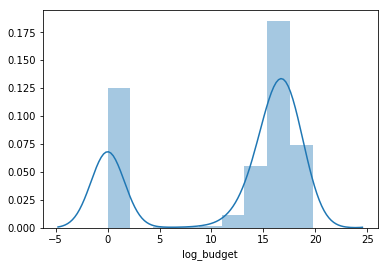

In [452]:
# train_data.isnull().sum()
sns.distplot(train_data['log_budget'])

In [14]:
# transform the release_date
train_data[['month', 'day', 'year']] = train_data['release_date'].str.split('/', expand=True).replace(np.nan, 0).astype(int)
train_data['year'] = train_data['year'].apply(lambda x: (x+2000) if x <= 19 else (x+1900))

train_release_date = pd.to_datetime(train_data['release_date'])
train_data['week'] = train_release_date.dt.dayofweek
train_data['quarter'] = train_release_date.dt.quarter

test_data[['month', 'day', 'year']] = test_data['release_date'].str.split('/', expand=True).replace(np.nan, 0).astype(int)
test_data['year'] = test_data['year'].apply(lambda x: (x+2000) if x <= 19 else (x+1900))

test_release_date = pd.to_datetime(test_data['release_date'])
test_data['week'] = test_release_date.dt.dayofweek
test_data['quarter'] = test_release_date.dt.quarter


In [15]:
# fill the uncorrect data in 'budget'
def replace_data(train):
    train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
    train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
    train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
    train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
    train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
    train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
    train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
    train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
    train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
    train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
    train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
    train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
    train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
    train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
    train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
    train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
    train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
    train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
    train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
    train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
    train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
    train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
    train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
    train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
    train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
    train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
    train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
    train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
    train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
    train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
    train.loc[train['id'] == 1347,'budget'] = 1
    train.loc[train['id'] == 1755,'budget'] = 2
    train.loc[train['id'] == 1801,'budget'] = 5
    train.loc[train['id'] == 1918,'budget'] = 592 
    train.loc[train['id'] == 2033,'budget'] = 4
    train.loc[train['id'] == 2118,'budget'] = 344 
    train.loc[train['id'] == 2252,'budget'] = 130
    train.loc[train['id'] == 2256,'budget'] = 1 
    train.loc[train['id'] == 2696,'budget'] = 10000000
    
def replace_test_data(test):
    test.loc[test['id'] == 6733,'budget'] = 5000000
    test.loc[test['id'] == 3889,'budget'] = 15000000
    test.loc[test['id'] == 6683,'budget'] = 50000000
    test.loc[test['id'] == 5704,'budget'] = 4300000
    test.loc[test['id'] == 6109,'budget'] = 281756
    test.loc[test['id'] == 7242,'budget'] = 10000000
    test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
    test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
    test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
    test.loc[test['id'] == 3033,'budget'] = 250 
    test.loc[test['id'] == 3051,'budget'] = 50
    test.loc[test['id'] == 3084,'budget'] = 337
    test.loc[test['id'] == 3224,'budget'] = 4  
    test.loc[test['id'] == 3594,'budget'] = 25  
    test.loc[test['id'] == 3619,'budget'] = 500  
    test.loc[test['id'] == 3831,'budget'] = 3  
    test.loc[test['id'] == 3935,'budget'] = 500  
    test.loc[test['id'] == 4049,'budget'] = 995946 
    test.loc[test['id'] == 4424,'budget'] = 3  
    test.loc[test['id'] == 4460,'budget'] = 8  
    test.loc[test['id'] == 4555,'budget'] = 1200000 
    test.loc[test['id'] == 4624,'budget'] = 30 
    test.loc[test['id'] == 4645,'budget'] = 500 
    test.loc[test['id'] == 4709,'budget'] = 450 
    test.loc[test['id'] == 4839,'budget'] = 7
    test.loc[test['id'] == 3125,'budget'] = 25 
    test.loc[test['id'] == 3142,'budget'] = 1
    test.loc[test['id'] == 3201,'budget'] = 450
    test.loc[test['id'] == 3222,'budget'] = 6
    test.loc[test['id'] == 3545,'budget'] = 38
    test.loc[test['id'] == 3670,'budget'] = 18
    test.loc[test['id'] == 3792,'budget'] = 19
    test.loc[test['id'] == 3881,'budget'] = 7
    test.loc[test['id'] == 3969,'budget'] = 400
    test.loc[test['id'] == 4196,'budget'] = 6
    test.loc[test['id'] == 4221,'budget'] = 11
    test.loc[test['id'] == 4222,'budget'] = 500
    test.loc[test['id'] == 4285,'budget'] = 11
    test.loc[test['id'] == 4319,'budget'] = 1
    test.loc[test['id'] == 4639,'budget'] = 10
    test.loc[test['id'] == 4719,'budget'] = 45
    test.loc[test['id'] == 4822,'budget'] = 22
    test.loc[test['id'] == 4829,'budget'] = 20
    test.loc[test['id'] == 4969,'budget'] = 20
    test.loc[test['id'] == 5021,'budget'] = 40 
    test.loc[test['id'] == 5035,'budget'] = 1 
    test.loc[test['id'] == 5063,'budget'] = 14 
    test.loc[test['id'] == 5119,'budget'] = 2 
    test.loc[test['id'] == 5214,'budget'] = 30 
    test.loc[test['id'] == 5221,'budget'] = 50 
    test.loc[test['id'] == 4903,'budget'] = 15
    test.loc[test['id'] == 4983,'budget'] = 3
    test.loc[test['id'] == 5102,'budget'] = 28
    test.loc[test['id'] == 5217,'budget'] = 75
    test.loc[test['id'] == 5224,'budget'] = 3 
    test.loc[test['id'] == 5469,'budget'] = 20 
    test.loc[test['id'] == 5840,'budget'] = 1 
    test.loc[test['id'] == 5960,'budget'] = 30
    test.loc[test['id'] == 6506,'budget'] = 11 
    test.loc[test['id'] == 6553,'budget'] = 280
    test.loc[test['id'] == 6561,'budget'] = 7
    test.loc[test['id'] == 6582,'budget'] = 218
    test.loc[test['id'] == 6638,'budget'] = 5
    test.loc[test['id'] == 6749,'budget'] = 8 
    test.loc[test['id'] == 6759,'budget'] = 50 
    test.loc[test['id'] == 6856,'budget'] = 10
    test.loc[test['id'] == 6858,'budget'] =  100
    test.loc[test['id'] == 6876,'budget'] =  250
    test.loc[test['id'] == 6972,'budget'] = 1
    test.loc[test['id'] == 7079,'budget'] = 8000000
    test.loc[test['id'] == 7150,'budget'] = 118
    test.loc[test['id'] == 6506,'budget'] = 118
    test.loc[test['id'] == 7225,'budget'] = 6
    test.loc[test['id'] == 7231,'budget'] = 85
    test.loc[test['id'] == 5222,'budget'] = 5
    test.loc[test['id'] == 5322,'budget'] = 90
    test.loc[test['id'] == 5350,'budget'] = 70
    test.loc[test['id'] == 5378,'budget'] = 10
    test.loc[test['id'] == 5545,'budget'] = 80
    test.loc[test['id'] == 5810,'budget'] = 8
    test.loc[test['id'] == 5926,'budget'] = 300
    test.loc[test['id'] == 5927,'budget'] = 4
    test.loc[test['id'] == 5986,'budget'] = 1
    test.loc[test['id'] == 6053,'budget'] = 20
    test.loc[test['id'] == 6104,'budget'] = 1
    test.loc[test['id'] == 6130,'budget'] = 30
    test.loc[test['id'] == 6301,'budget'] = 150
    test.loc[test['id'] == 6276,'budget'] = 100
    test.loc[test['id'] == 6473,'budget'] = 100
    test.loc[test['id'] == 6842,'budget'] = 30
    
replace_data(train_data)
replace_test_data(test_data)

In [16]:
# fill the missing data
nan_feature = ['runtime', 'popularity2', 'rating', 'totalVotes', 'genres_num', 'production_companies_num', 'production_countries_num','spoken_languages_num','Keywords_num','cast_num','crew_num']

for feature in nan_feature:
    train_data[feature].fillna(train_data[feature].median(), inplace=True)
    test_data[feature].fillna(test_data[feature].median(), inplace=True)
    

In [102]:
train_data.describe()

,id,budget,popularity,runtime,revenue,popularity2,rating,totalVotes,is_belong_to_collection,collection_id,genres_num,production_companies_num,production_countries_num,spoken_languages_num,Keywords_num,cast_num,crew_num,has_homepage,is_original_language_en,has_tagline,is_title_diff,month,day,year,week,quarter
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,604.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,2.269379e+07,8.463274,107.854000,6.668176e+07,8.008621,6.367633,908.708667,0.201333,125999.468543,2.508333,2.802333,1.344667,1.459000,7.778667,20.742333,24.445667,0.315333,0.858333,0.801000,1.0,6.775333,15.046333,1999.713000,3.255667,2.577667
std,866.169729,3.704356e+07,12.104000,22.079293,1.375149e+08,4.861687,0.869855,1763.845651,0.401063,131086.692170,1.110709,1.921586,0.731699,0.880479,6.281839,16.523588,28.018174,0.464726,0.348766,0.399315,0.0,3.409115,8.632981,15.423313,1.325979,1.105611
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00,0.600000,1.000000,1.000000,0.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1921.000000,0.000000,1.000000
25%,750.750000,0.000000e+00,4.018053,94.000000,2.401550e+06,5.172750,5.900000,87.000000,0.000000,9735.000000,2.000000,1.000000,1.000000,1.000000,4.000000,11.000000,8.000000,0.000000,1.000000,1.000000,1.0,4.000000,8.000000,1993.000000,2.000000,2.000000
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,7.503500,6.400000,292.500000,0.000000,92616.000000,2.000000,2.000000,1.000000,1.000000,6.000000,16.000000,15.000000,0.000000,1.000000,1.000000,1.0,7.000000,15.000000,2004.000000,4.000000,3.000000
75%,2250.250000,3.000000e+07,10.890983,118.000000,6.877599e+07,9.857500,7.000000,852.250000,0.000000,180642.500000,3.000000,4.000000,1.000000,2.000000,10.000000,24.000000,28.000000,1.000000,1.000000,1.000000,1.0,10.000000,22.000000,2011.000000,4.000000,4.000000
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,45.153000,9.000000,18931.000000,1.000000,479888.000000,7.000000,17.000000,8.000000,9.000000,149.000000,156.000000,194.000000,1.000000,1.000000,1.000000,1.0,12.000000,31.000000,2017.000000,6.000000,4.000000


Text(0.5,1,'production_countries_num')

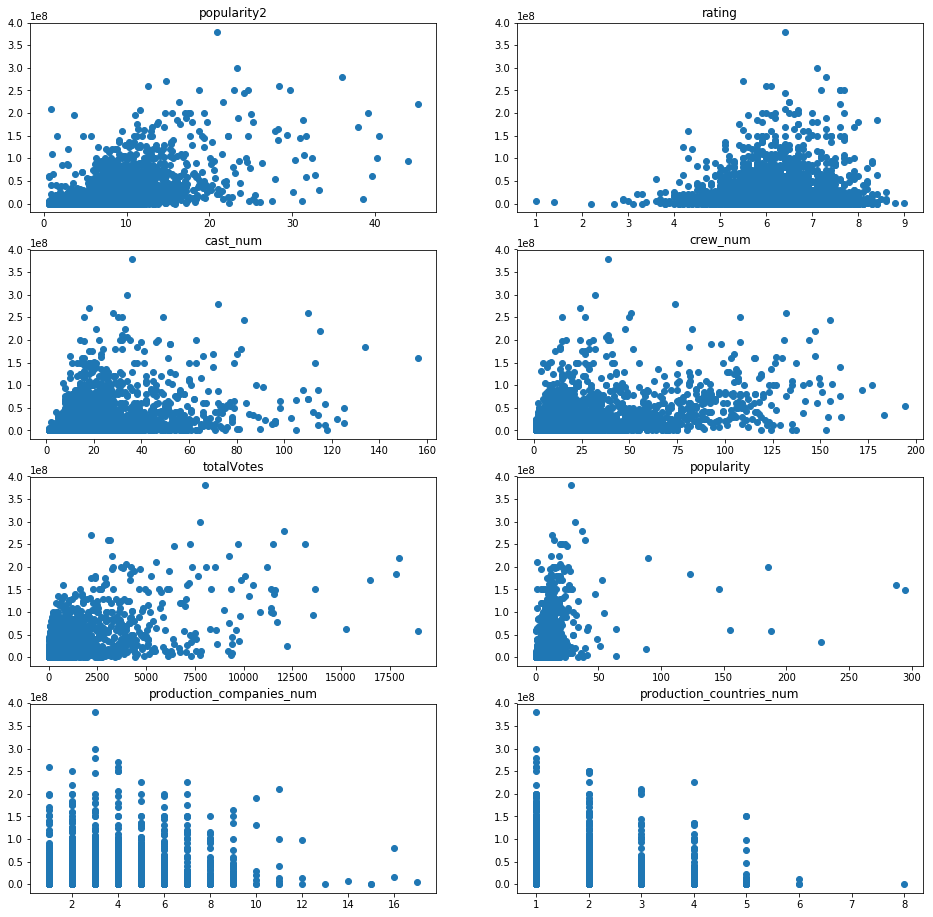

In [534]:
# find the budget corelation
f, ax = plt.subplots(4, 2, figsize = (16, 16))
ax[0][0].scatter(x=train_data['popularity2'], y=train_data['budget'])
ax[0][0].set_title('popularity2')

ax[0][1].scatter(x=train_data['rating'], y=train_data['budget'])
ax[0][1].set_title('rating')

ax[1][0].scatter(x=train_data['cast_num'], y=train_data['budget'])
ax[1][0].set_title('cast_num')

ax[1][1].scatter(x=train_data['crew_num'], y=train_data['budget'])
ax[1][1].set_title('crew_num')

ax[2][0].scatter(x=train_data['totalVotes'], y=train_data['budget'])
ax[2][0].set_title('totalVotes')

ax[2][1].scatter(x=train_data['popularity'], y=train_data['budget'])
ax[2][1].set_title('popularity')

ax[3][0].scatter(x=train_data['production_companies_num'], y=train_data['budget'])
ax[3][0].set_title('production_companies_num')

ax[3][1].scatter(x=train_data['production_countries_num'], y=train_data['budget'])
ax[3][1].set_title('production_countries_num')


In [17]:
from sklearn.preprocessing import PolynomialFeatures
data_x = train_data.loc[train_data['budget']!=0, ['popularity2', 'rating', 'cast_num', 'crew_num', 'totalVotes', 'popularity']].values
data_y = train_data.loc[train_data['budget']!=0, 'budget'].values
predict_x = train_data.loc[train_data['budget']==0, ['popularity2', 'rating', 'cast_num', 'crew_num', 'totalVotes', 'popularity']].values
budget_imdb_id = train_data.loc[train_data['budget']==0,'imdb_id'].values

test_data_x = test_data.loc[test_data['budget']!=0, ['popularity2', 'rating', 'cast_num', 'crew_num', 'totalVotes', 'popularity']].values
test_data_y = test_data.loc[test_data['budget']!=0, 'budget'].values
test_predict_x = test_data.loc[test_data['budget']==0, ['popularity2', 'rating', 'cast_num', 'crew_num', 'totalVotes', 'popularity']].values
test_budget_imdb_id = test_data.loc[test_data['budget']==0,'imdb_id'].values

## predict budget

In [27]:
def predict_value(data_x, data_y, predict_x): 
    budget_std = np.std(data_y) 
    budget_mean = np.mean(data_y)
    data_x = (data_x - np.mean(data_x))/np.std(data_x)
    data_y = (data_y - np.mean(data_y))/budget_std
    predict_x = (predict_x - np.mean(predict_x))/np.std(predict_x)

    train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)
    linear_model = LinearRegression()
    
    linear_model.fit(train_x, train_y)

    test_predict = linear_model.predict(test_x)
    score_1 = np.sqrt(np.mean(np.square(test_predict, test_y)))
    score = linear_model.score(test_x, test_y)
    print(score, score_1)

    predict_y = linear_model.predict(predict_x)
    budget_predict = linear_model.predict(predict_x)
    budget_predict = budget_predict*budget_std + budget_mean
    
    return budget_predict

train_budget_predict = predict_value(data_x, data_y, predict_x)
# test_budget_predict = predict_value(test_data_x, test_data_y, test_predict_x)
# print(budget_predict)
# PolynomialFeatures
# poly = PolynomialFeatures(degree = 2)
# poly_train_x = poly.fit_transform(train_x)
# poly_test_x = poly.fit_transform(test_x)

# poly_model = LinearRegression()
# poly_model.fit(poly_train_x, train_y)
# score = poly_model.score(poly_test_x, test_y)

# poly_predict = poly_model.predict(poly_test_x)
# score_1 = np.sqrt(np.mean(np.square(poly_predict, test_y)))
# print(score, score_1)

0.3136228457758433 0.57704388431257
0.3136228457758433 0.57704388431257
0.3136228457758433 0.57704388431257
0.3136228457758433 0.57704388431257
0.3136228457758433 0.57704388431257
0.3136228457758433 0.57704388431257
0.3136228457758433 0.57704388431257
0.3136228457758433 0.57704388431257
0.3136228457758433 0.57704388431257
0.3136228457758433 0.57704388431257


In [638]:
print(train_budget_predict)

[6.54068351e+08 4.90683082e+08 6.57493806e+08 7.15001324e+08
 7.22399856e+08 7.69249066e+08 7.27021096e+08 7.05625093e+08
 7.12469227e+08 6.34807135e+08 8.55558952e+08 7.04787560e+08
 6.55926237e+08 5.26439588e+08 7.58866343e+08 6.82775093e+08
 6.37811527e+08 7.14154241e+08 5.76592607e+08 5.91024296e+08
 7.56818236e+08 5.41406447e+08 6.04537984e+08 5.13838615e+08
 6.45558645e+08 5.58414048e+08 6.12470752e+08 6.61946457e+08
 6.70019859e+08 5.08852305e+08 6.40774501e+08 7.08719188e+08
 6.49998671e+08 8.22895056e+08 6.65419650e+08 5.27396786e+08
 6.97069229e+08 8.22807873e+08 6.97751503e+08 7.89489531e+08
 7.93358746e+08 6.90917900e+08 5.34087872e+08 5.63235956e+08
 5.63268947e+08 7.92007335e+08 7.61735775e+08 6.58861057e+08
 5.10917161e+08 7.36737439e+08 5.73143824e+08 6.84798169e+08
 5.53688904e+08 6.52379149e+08 6.54681067e+08 8.37513263e+08
 6.44329143e+08 5.46050278e+08 5.96883393e+08 6.89907486e+08
 6.54498844e+08 6.08061734e+08 6.91933044e+08 6.51693138e+08
 7.09151997e+08 6.419464

In [639]:
# fill the budget whose value is 0
for i in range(len(budget_imdb_id)):
    train_data.loc[train_data['imdb_id']==budget_imdb_id[i], 'budget'] = train_budget_predict[i]
for i in range(len(test_budget_imdb_id)):
    test_data.loc[test_data['imdb_id']==test_budget_imdb_id[i], 'budget'] = test_budget_predict[i]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


1.500000e+07    73
4.000000e+07    71
2.500000e+07    71
2.000000e+07    69
5.000000e+06    68
3.000000e+07    66
1.000000e+07    55
1.200000e+07    53
5.000000e+07    50
3.500000e+07    46
6.000000e+07    43
4.000000e+06    41
6.000000e+06    39
8.000000e+06    39
2.000000e+06    38
1.300000e+07    37
7.000000e+06    34
3.000000e+06    34
1.800000e+07    32
8.000000e+07    27
1.600000e+07    27
1.400000e+07    26
1.100000e+07    24
2.800000e+07    22
9.000000e+06    21
2.200000e+07    21
7.000000e+07    20
1.900000e+07    20
6.500000e+07    20
1.700000e+07    20
                ..
6.573340e+08     1
6.266195e+08     1
6.621410e+05     1
1.117800e+04     1
5.771008e+08     1
6.890146e+08     1
6.738665e+08     1
6.464114e+08     1
6.654092e+08     1
7.633792e+08     1
6.870039e+08     1
5.505938e+08     1
6.756687e+08     1
7.427385e+08     1
1.256000e+07     1
2.450000e+08     1
1.021560e+09     1
8.649300e+08     1
6.161599e+08     1
6.928221e+08     1
6.027262e+08     1
6.190481e+08

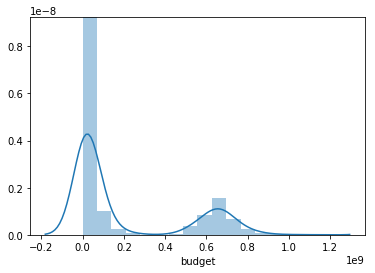

In [643]:
sns.distplot(train_data['budget'])
train_data['budget'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


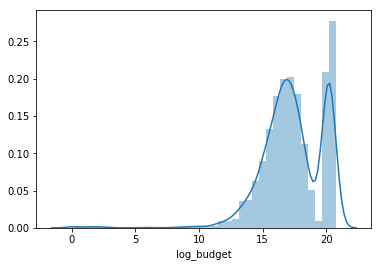

In [631]:
train_data['log_budget'] = np.log(train_data['budget'])
sns.distplot(train_data['log_budget'])

Text(0.5,1,'production_countries_num')

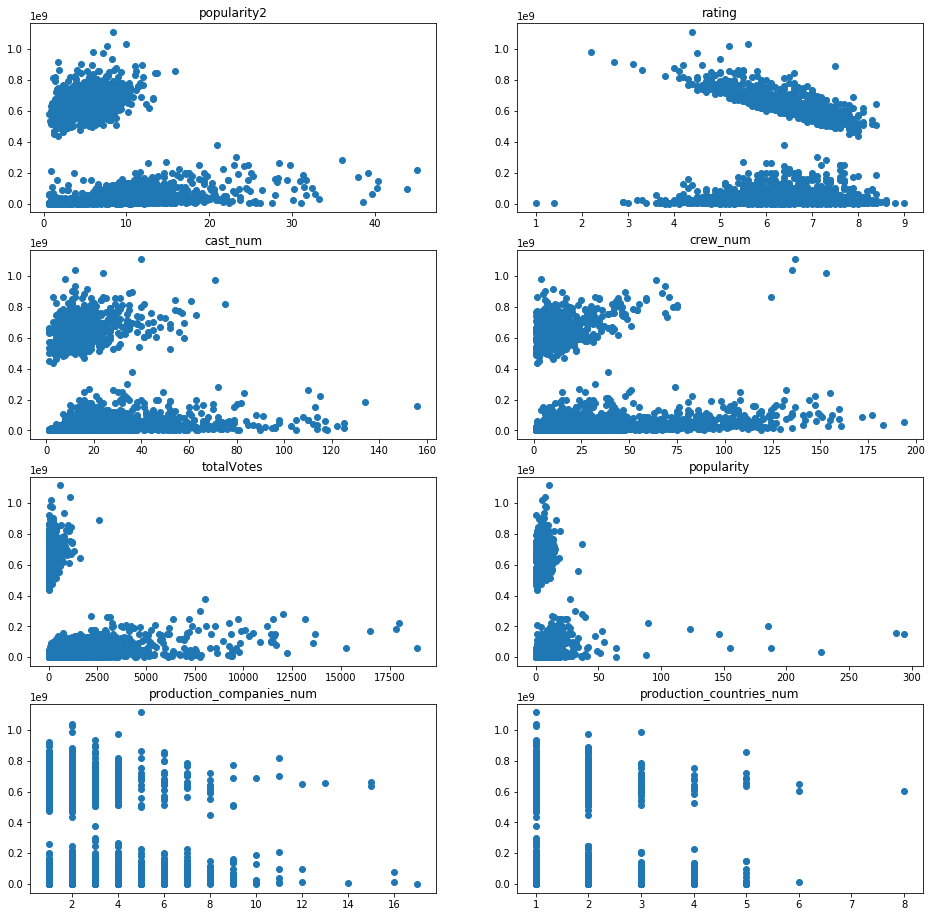

In [640]:
# find the budget corelation
f, ax = plt.subplots(4, 2, figsize = (16, 16))
ax[0][0].scatter(x=train_data['popularity2'], y=train_data['budget'])
ax[0][0].set_title('popularity2')

ax[0][1].scatter(x=train_data['rating'], y=train_data['budget'])
ax[0][1].set_title('rating')

ax[1][0].scatter(x=train_data['cast_num'], y=train_data['budget'])
ax[1][0].set_title('cast_num')

ax[1][1].scatter(x=train_data['crew_num'], y=train_data['budget'])
ax[1][1].set_title('crew_num')

ax[2][0].scatter(x=train_data['totalVotes'], y=train_data['budget'])
ax[2][0].set_title('totalVotes')

ax[2][1].scatter(x=train_data['popularity'], y=train_data['budget'])
ax[2][1].set_title('popularity')

ax[3][0].scatter(x=train_data['production_companies_num'], y=train_data['budget'])
ax[3][0].set_title('production_companies_num')

ax[3][1].scatter(x=train_data['production_countries_num'], y=train_data['budget'])
ax[3][1].set_title('production_countries_num')

In [115]:
# statistics feature
def calculate_statistics(data):
    data['budget_runtime_ratio'] = data['budget']/data['runtime']
    data['popularity_runtime_ratio'] = data['popularity']/data['runtime']
    

    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]), <a list of 90 Text xticklabel objects>)

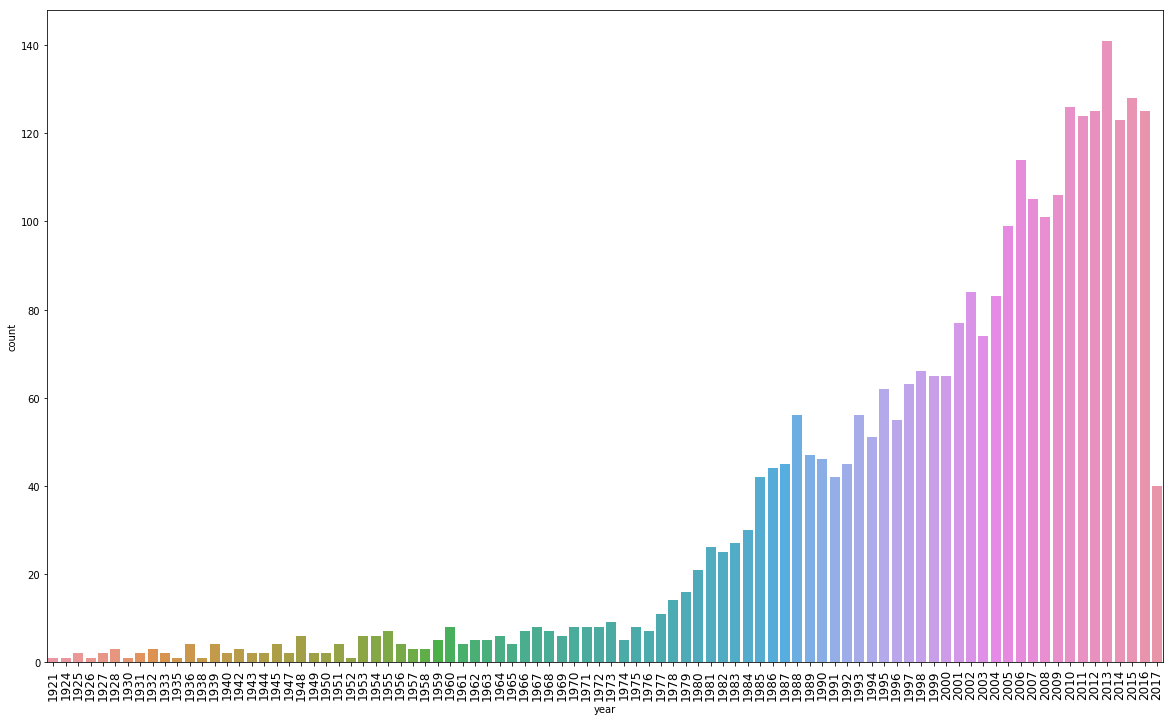

In [478]:
plt.figure(figsize=(20, 12))
sns.countplot(train_data['year'].sort_values())
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)

In [641]:
train_data['budget'].to_csv('train_budget.csv')
test_data['budget'].to_csv('test_budget.csv')